In [8]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import urllib #download from football data

from __future__ import division
%matplotlib inline

### Load the data

In [9]:
testfile = urllib.URLopener()
testfile.retrieve("http://www.football-data.co.uk/mmz4281/1617/E0.csv", "./Data/England/E0_16.csv")

('./Data/England/E0_16.csv', <httplib.HTTPMessage instance at 0x7fc497a00098>)

In [10]:
df = pd.read_csv("./Data/England/E0_16.csv")

In [11]:
df.columns

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS', u'HST', u'AST',
       u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H',
       u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA',
       u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA',
       u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA'],
      dtype='object')

### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [12]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

In [13]:
res_16.head()
feature_table = df.ix[:,:23]

In [14]:
res_16.tail()

HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR      Referee  \
264   West Brom  Crystal Palace     0     2   A     0     0   D      M Jones   
265  Sunderland        Man City     0     2   A     0     1   A   M Atkinson   
266   Tottenham         Everton     3     2   H     1     0   H     M Oliver   
267    West Ham         Chelsea     1     2   A     0     1   A   A Marriner   
268    Man City           Stoke     0     0   D     0     0   D  N Swarbrick   

     HS ...  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
264  11 ...    1    4   8  12   5   5   0   1   0   0  
265  11 ...    3    7  11   4   6   4   1   0   0   0  
266  20 ...    7    4   9  14   7   2   1   2   0   0  
267  11 ...    2    4   8   8   6   4   0   1   0   0  
268  12 ...    1    2   8  11   8   1   1   3   0   0  

[5 rows x 21 columns]

In [15]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))

In [16]:
res_16.shape[0]

269

In [17]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print "Average number of goals at home",avg_home_scored_16
print "Average number of goals away", avg_away_scored_16
print "Average number of goals conceded at home",avg_home_conceded_16
print "Average number of goals conceded away",avg_away_conceded_16

Average number of goals at home 1.60966542751
Average number of goals away 1.22304832714
Average number of goals conceded at home 1.22304832714
Average number of goals conceded away 1.60966542751


In [18]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [19]:
# list(res_home)[0]

In [20]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

Team  HGS  AGS  HAS  AAS  HGC  AGC  HDS  ADS
0          Arsenal   26   29  NaN  NaN   13   18  NaN  NaN
1      Bournemouth   21   16  NaN  NaN   21   31  NaN  NaN
2          Burnley   22    8  NaN  NaN   12   28  NaN  NaN
3          Chelsea   36   21  NaN  NaN    8   12  NaN  NaN
4   Crystal Palace   14   21  NaN  NaN   20   26  NaN  NaN
5          Everton   27   17  NaN  NaN   10   20  NaN  NaN
6             Hull   17    7  NaN  NaN   22   31  NaN  NaN
7        Leicester   22    8  NaN  NaN   18   27  NaN  NaN
8        Liverpool   34   24  NaN  NaN   12   22  NaN  NaN
9         Man City   23   30  NaN  NaN   13   16  NaN  NaN
10      Man United   20   19  NaN  NaN   10   12  NaN  NaN
11   Middlesbrough   11    8  NaN  NaN   14   16  NaN  NaN
12     Southampton   14   18  NaN  NaN   14   20  NaN  NaN
13           Stoke   18   14  NaN  NaN   15   25  NaN  NaN
14      Sunderland   14   10  NaN  NaN   26   24  NaN  NaN
15         Swansea   21   14  NaN  NaN   30   29  NaN  NaN
16       Tottenham   33   20  NaN  NaN    7   13  NaN  NaN
17         Watford   21   12  NaN  NaN   23   24  NaN  NaN
18       West Brom   24   12  NaN  NaN   17   17  NaN  NaN
19        West Ham   15   21  NaN  NaN   24   22  NaN  NaN

In [21]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [24]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

Team  HGS  AGS       HAS       AAS  HGC  AGC       HDS       ADS
0          Arsenal   26   29  1.200924  1.762918   13   18  0.790274  0.831409
1      Bournemouth   21   16  0.969977  0.972644   21   31  1.276596  1.431871
2          Burnley   22    8  1.016166  0.486322   12   28  0.729483  1.293303
3          Chelsea   36   21  1.662818  1.276596    8   12  0.486322  0.554273
4   Crystal Palace   14   21  0.646651  1.276596   20   26  1.215805  1.200924
5          Everton   27   17  1.247113  1.033435   10   20  0.607903  0.923788
6             Hull   17    7  0.785219  0.425532   22   31  1.337386  1.431871
7        Leicester   22    8  1.016166  0.486322   18   27  1.094225  1.247113
8        Liverpool   34   24  1.570439  1.458967   12   22  0.729483  1.016166
9         Man City   23   30  1.062356  1.823708   13   16  0.790274  0.739030
10      Man United   20   19  0.923788  1.155015   10   12  0.607903  0.554273
11   Middlesbrough   11    8  0.508083  0.486322   14   16  0.851064  0.739030
12     Southampton   14   18  0.646651  1.094225   14   20  0.851064  0.923788
13           Stoke   18   14  0.831409  0.851064   15   25  0.911854  1.154734
14      Sunderland   14   10  0.646651  0.607903   26   24  1.580547  1.108545
15         Swansea   21   14  0.969977  0.851064   30   29  1.823708  1.339492
16       Tottenham   33   20  1.524249  1.215805    7   13  0.425532  0.600462
17         Watford   21   12  0.969977  0.729483   23   24  1.398176  1.108545
18       West Brom   24   12  1.108545  0.729483   17   17  1.033435  0.785219
19        West Ham   15   21  0.692841  1.276596   24   22  1.458967  1.016166

In [25]:
table_16[table_16.Team == "Swansea"]

Team  HGS  AGS       HAS       AAS  HGC  AGC       HDS       ADS
15  Swansea   21   14  0.969977  0.851064   30   29  1.823708  1.339492

In [26]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [27]:
feature_table.head(20)

HomeTeam        AwayTeam FTR  HST  AST       HAS       HDS  \
0          Burnley         Swansea   A    3    9  1.016166  0.729483   
1   Crystal Palace       West Brom   A    4    3  0.646651  1.215805   
2          Everton       Tottenham   D    6    4  1.247113  0.607903   
3             Hull       Leicester   H    5    5  0.785219  1.337386   
4         Man City      Sunderland   H    4    3  1.062356  0.790274   
5    Middlesbrough           Stoke   D    2    1  0.508083  0.851064   
6      Southampton         Watford   D    6    1  0.646651  0.851064   
7          Arsenal       Liverpool   A    5    7  1.200924  0.790274   
8      Bournemouth      Man United   A    3    7  0.969977  1.276596   
9          Chelsea        West Ham   H    6    3  1.662818  0.486322   
10      Man United     Southampton   H    5    1  0.923788  0.607903   
11         Burnley       Liverpool   H    2    5  1.016166  0.729483   
12       Leicester         Arsenal   D    1    4  1.016166  1.094225   
13           Stoke        Man City   A    3    6  0.831409  0.911854   
14         Swansea            Hull   A    3    4  0.969977  1.823708   
15       Tottenham  Crystal Palace   H    5    2  1.524249  0.425532   
16         Watford         Chelsea   A    2    4  0.969977  1.398176   
17       West Brom         Everton   A    4    7  1.108545  1.033435   
18      Sunderland   Middlesbrough   A    5    3  0.646651  1.580547   
19        West Ham     Bournemouth   H    2    5  0.692841  1.458967   

         AAS       ADS  
0   0.851064  1.339492  
1   0.729483  0.785219  
2   1.215805  0.600462  
3   0.486322  1.247113  
4   0.607903  1.108545  
5   0.851064  1.154734  
6   0.729483  1.108545  
7   1.458967  1.016166  
8   1.155015  0.554273  
9   1.276596  1.016166  
10  1.094225  0.923788  
11  1.458967  1.016166  
12  1.762918  0.831409  
13  1.823708  0.739030  
14  0.425532  1.431871  
15  1.276596  1.200924  
16  1.276596  0.554273  
17  1.033435  0.923788  
18  0.486322  0.739030  
19  0.972644  1.431871

In [28]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [29]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [30]:
feature_table.tail(10)

HomeTeam        AwayTeam FTR  HST  AST       HAS       HDS       AAS  \
259   Liverpool         Arsenal   H    7    3  1.570439  0.729483  1.762918   
260  Man United     Bournemouth   D    7    1  0.923788  0.607903  0.972644   
261       Stoke   Middlesbrough   H    8    2  0.831409  0.911854  0.486322   
262     Swansea         Burnley   H   10    4  0.969977  1.823708  0.486322   
263     Watford     Southampton   A    4   11  0.969977  1.398176  1.094225   
264   West Brom  Crystal Palace   A    1    4  1.108545  1.033435  1.276596   
265  Sunderland        Man City   A    3    7  0.646651  1.580547  1.823708   
266   Tottenham         Everton   H    7    4  1.524249  0.425532  1.033435   
267    West Ham         Chelsea   A    2    4  0.692841  1.458967  1.276596   
268    Man City           Stoke   D    1    2  1.062356  0.790274  0.851064   

          ADS  Result  
259  0.831409       1  
260  1.431871       0  
261  0.739030       1  
262  1.293303       1  
263  0.923788      -1  
264  1.200924      -1  
265  0.739030      -1  
266  0.923788       1  
267  0.554273      -1  
268  1.154734       0

In [31]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [33]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [34]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.44827586  0.60714286  0.55555556  0.7037037   0.48148148  0.74074074
  0.53846154  0.57692308  0.57692308  0.80769231]
0.603690020069


In [35]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.44827586  0.53571429  0.66666667  0.62962963  0.55555556  0.55555556
  0.61538462  0.61538462  0.57692308  0.76923077]
0.596832063211


In [36]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.62068966  0.64285714  0.55555556  0.62962963  0.59259259  0.7037037
  0.65384615  0.65384615  0.53846154  0.73076923]
0.632195135643


In [37]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.4137931   0.64285714  0.62962963  0.59259259  0.44444444  0.7037037
  0.57692308  0.57692308  0.65384615  0.80769231]
0.604240523206


## Adding Recent Performance

In [69]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [70]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [71]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Chelsea','Watford','D',0,0,0,0,0,0],
                             ['Liverpool','Burnley','D',0,0,0,0,0,0],
                             ['Southampton','Man United','D',0,0,0,0,0,0],
                             ['Arsenal','Leicester','D',0,0,0,0,0,0],
                             ['Crystal Palace','Tottenham','D',0,0,0,0,0,0],
                             ['Middlesbrough','Sunderland','D',0,0,0,0,0,0],
                             ['Bournemouth','West Ham','D',0,0,0,0,0,0],
                             ['Everton','West Brom','D',0,0,0,0,0,0],
                             ['Hull','Swansea','D',0,0,0,0,0,0],
                             ['Man City','Stoke','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [72]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(279, 9)

In [73]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [74]:
feat_table.head()

HomeTeam    AwayTeam FTR  FTHG  FTAG  HS  AS  HC  AC  pastHS  \
278         Chelsea     Watford   D     0     0   0   0   0   0     0.0   
277       Liverpool     Burnley   D     0     0   0   0   0   0     0.0   
276     Southampton  Man United   D     0     0   0   0   0   0     0.0   
275         Arsenal   Leicester   D     0     0   0   0   0   0     0.0   
274  Crystal Palace   Tottenham   D     0     0   0   0   0   0     0.0   

     pastHC  pastAS  pastAC  pastHG  pastAG  
278     0.0     0.0     0.0     0.0     0.0  
277     0.0     0.0     0.0     0.0     0.0  
276     0.0     0.0     0.0     0.0     0.0  
275     0.0     0.0     0.0     0.0     0.0  
274     0.0     0.0     0.0     0.0     0.0

In [75]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [77]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [78]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [79]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [80]:
# num_games decides the train-test split
print feat_table.shape
num_games = feat_table.shape[0]-10
num_games

(279, 19)


269

In [81]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [82]:
### Try predictions here too.

# Adding home advantage

In [83]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [84]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print num_games
v_split = 20
n_games = num_games - v_split

269


In [85]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [86]:
X_predict

pastCornerDiff  pastGoalDiff  pastShotsDiff       HAS       HDS  \
269          0.0000        0.1875         1.3750  1.062356  0.790274   
270         -0.8750       -0.1875         3.6875  0.785219  1.337386   
271          0.0625        0.3125         3.2500  1.247113  0.607903   
272          0.6250       -0.1250         3.6250  0.969977  1.276596   
273         -0.1250       -0.2500         3.0000  0.508083  0.851064   
274         -1.0000       -0.3125         1.9375  0.646651  1.215805   
275         -0.0625       -0.0625         2.7500  1.200924  0.790274   
276         -1.0625        0.2500         2.0625  0.646651  0.851064   
277          0.3750        0.0625         1.8125  1.570439  0.729483   
278          0.4375        0.1875         1.4375  1.662818  0.486322   

          AAS       ADS  
269  1.823708  0.739030  
270  0.425532  1.431871  
271  1.033435  0.923788  
272  0.972644  1.431871  
273  0.486322  0.739030  
274  1.276596  1.200924  
275  1.762918  0.831409  
276  1.094225  0.923788  
277  1.458967  1.016166  
278  1.276596  0.554273

In [87]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [88]:
#KNN
plot_scores_knn = []
for b in xrange(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in xrange(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


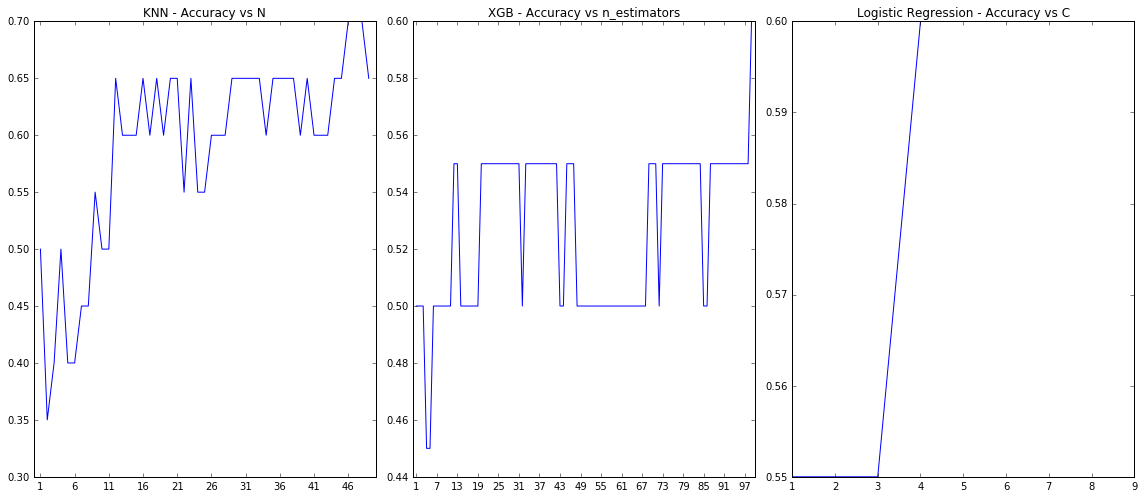

In [89]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(xrange(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(xrange(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(xrange(1,100),plot_scores_XGB);
ax2.set_xticks(xrange(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(xrange(1,10),plot_scores_logreg);
ax3.set_xticks(xrange(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [90]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print max_knn_n, max_knn_ind
print max_XGB_e, max_XGB_ind
print max_logreg_c, max_logreg_ind

0.7 45
0.6 98
0.6 3


In [98]:
clf_knn = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=98).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=3,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [99]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [100]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [101]:
this_week

HomeTeam    AwayTeam  Result_knn  Result_XGB  Result_logreg
269        Man City       Stoke           1           1              1
270            Hull     Swansea          -1          -1             -1
271         Everton   West Brom           1           1              1
272     Bournemouth    West Ham           1           1              1
273   Middlesbrough  Sunderland          -1          -1             -1
274  Crystal Palace   Tottenham          -1          -1             -1
275         Arsenal   Leicester           1           1              1
276     Southampton  Man United           1          -1              1
277       Liverpool     Burnley           1           1              1
278         Chelsea     Watford           1           1              1

In [102]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [103]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [104]:
print max_knn_n, max_XGB_e, max_logreg_c
this_week

0.7 0.6 0.6


HomeTeam    AwayTeam Res_knn Res_XGB Res_logreg
269        Man City       Stoke       H       H          H
270            Hull     Swansea       A       A          A
271         Everton   West Brom       H       H          H
272     Bournemouth    West Ham       H       H          H
273   Middlesbrough  Sunderland       A       A          A
274  Crystal Palace   Tottenham       A       A          A
275         Arsenal   Leicester       H       H          H
276     Southampton  Man United       H       A          H
277       Liverpool     Burnley       H       H          H
278         Chelsea     Watford       H       H          H